## <div align="center"> TUGAS LAB IF540 MACHINE LEARNING </div>
### <div align="center"> WEEK [--] : [TOPIC] </div>

#### <div align="center"> Semester Ganjil 2022/2023 </div>

In [ ]:
import datetime
import uuid    

# Fill in your name and NIM
myName = "Antonius Kevin Budi Saputra"
myNIM = "45444"

myDate = datetime.datetime.now()
myDevice = str(uuid.uuid1())

# Header
print("Name: \t\t{}".format(myName))
print("NIM: \t\t{}".format(myNIM))
print("Start: \t\t{}".format(myDate))
print("Device ID: \t{}".format(myDevice))


---

### Dataset yang dipakai:

1. [Nama dataset1] – sumber : [cantumkan link dataset]
2. [Nama dataset2] – sumber : [cantumkan link dataset]

### Hasil kerja

In [1]:
import sys
import tensorflow.keras as tk
import pandas as pd
import sklearn as sk
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
covid = pd.read_csv("COVID-19.csv", index_col='date', parse_dates=['date'])

In [4]:
covid.head()

,iso,country,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,residential_percent_change_from_baseline,retail_and_recreation_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,confirmed_cases,confirmed_deaths,...,total_tests,total_vaccinations,people_vaccinated,people_fully_vaccinated,gdp_ppp_per_capita,population,population_density,human_development_index,pop_age_above_65_percentage,health_index
date,,,,,,,,,,,,,,,,,,,,,
2020-02-15,AE,United Arab Emirates,4.0,5.0,1.0,0.0,0.0,2.0,8,0,...,NaN,NaN,NaN,NaN,75075.26,9865845.0,118.0,0.866,1.09,0.886
2020-02-16,AE,United Arab Emirates,4.0,4.0,1.0,1.0,1.0,2.0,9,0,...,5042.0,NaN,NaN,NaN,75075.26,9865845.0,118.0,0.866,1.09,0.886
2020-02-17,AE,United Arab Emirates,1.0,5.0,1.0,-1.0,1.0,2.0,9,0,...,NaN,NaN,NaN,NaN,75075.26,9865845.0,118.0,0.866,1.09,0.886
2020-02-18,AE,United Arab Emirates,1.0,5.0,1.0,-2.0,0.0,2.0,9,0,...,6693.0,NaN,NaN,NaN,75075.26,9865845.0,118.0,0.866,1.09,0.886
2020-02-19,AE,United Arab Emirates,0.0,4.0,1.0,-2.0,-1.0,2.0,9,0,...,NaN,NaN,NaN,NaN,75075.26,9865845.0,118.0,0.866,1.09,0.886


In [3]:
np.unique(covid['country'])

array(['Afghanistan', 'Angola', 'Antigua and Barbuda', 'Argentina',
       'Aruba', 'Australia', 'Austria', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria',
       'Burkina Faso', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Czechia',
       "Côte d'Ivoire", 'Denmark', 'Dominican Republic', 'Ecuador',
       'Egypt', 'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala',
       'Guinea-Bissau', 'Haiti', 'Honduras', 'Hong Kong', 'Hungary',
       'India', 'Indonesia', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Kuwait',
       'Kyrgyzstan', 'Laos', 'Latvia', 'Lebanon', 'Libya',
       'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malaysia', 'Mali',
       'Malta', 'Mauritius', 'Mexico', 'Moldova',

### Take SouthEast Asia Data

In [6]:
covid_ind = covid[covid['country']=='Indonesia']
covid_mly = covid[covid['country']=='Malaysia']
covid_sg = covid[covid['country']=='Singapore']
covid_th = covid[covid['country']=='Thailand']
covid_vt = covid[covid['country']=='Vietnam']
covid_laos = covid[covid['country']=='Laos']
covid_ph = covid[covid['country']=='Philipines']
covid_cam = covid[covid['country']=='Cambodia']

In [7]:
data = pd.concat([covid_ind, covid_mly, covid_sg, covid_th, covid_vt, covid_laos, covid_ph, covid_cam])

In [8]:
np.unique(data['country'])

array(['Cambodia', 'Indonesia', 'Laos', 'Malaysia', 'Singapore',
       'Thailand', 'Vietnam'], dtype=object)

In [9]:
covid = data

### Check Correlation between Data

In [10]:
covid.corr()

,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,residential_percent_change_from_baseline,retail_and_recreation_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,confirmed_cases,confirmed_deaths,gov_response_stringency_index,total_tests,total_vaccinations,people_vaccinated,people_fully_vaccinated,gdp_ppp_per_capita,population,population_density,human_development_index,pop_age_above_65_percentage,health_index
grocery_and_pharmacy_percent_change_from_baseline,1.000000,0.507787,-0.577338,0.789658,0.732437,0.477889,0.065004,0.056546,-0.333530,0.644449,0.032281,0.026171,0.266336,0.034540,0.092480,0.044633,0.115143,0.235356,0.096514
parks_percent_change_from_baseline,0.507787,1.000000,-0.538879,0.724229,0.611633,0.330226,0.021115,0.066716,-0.416354,0.094385,0.353975,0.350912,0.425693,-0.150927,0.056395,-0.099650,-0.214043,-0.170593,-0.202410
residential_percent_change_from_baseline,-0.577338,-0.538879,1.000000,-0.786703,-0.737449,-0.765523,0.036429,-0.003618,0.437506,-0.593422,0.010288,0.019388,-0.553825,0.503921,-0.088000,0.432110,0.445864,0.183100,0.455830
retail_and_recreation_percent_change_from_baseline,0.789658,0.724229,-0.786703,1.000000,0.792728,0.641194,-0.007969,0.021741,-0.644382,0.499778,0.019094,0.008653,0.284141,-0.201623,0.042976,-0.127628,-0.235867,-0.019463,-0.213573
transit_stations_percent_change_from_baseline,0.732437,0.611633,-0.737449,0.792728,1.000000,0.728171,-0.044919,-0.011969,-0.502199,-0.052906,0.109350,0.098925,0.051521,-0.079374,0.070430,-0.009374,-0.048537,0.048303,-0.161136
workplaces_percent_change_from_baseline,0.477889,0.330226,-0.765523,0.641194,0.728171,1.000000,-0.159527,-0.139163,-0.427859,0.269983,-0.297163,-0.305988,-0.108404,-0.250677,-0.031099,-0.181862,-0.236906,-0.071581,-0.309622
confirmed_cases,0.065004,0.021115,0.036429,-0.007969,-0.044919,-0.159527,1.000000,0.977157,0.193399,0.906529,0.728165,0.729425,0.592159,-0.033388,0.543074,-0.053039,0.037739,-0.100070,0.124699
confirmed_deaths,0.056546,0.066716,-0.003618,0.021741,-0.011969,-0.139163,0.977157,1.000000,0.166735,0.785571,0.721960,0.721372,0.574212,-0.113724,0.629775,-0.114150,-0.043066,-0.146532,0.057448
gov_response_stringency_index,-0.333530,-0.416354,0.437506,-0.644382,-0.502199,-0.427859,0.193399,0.166735,1.000000,-0.056447,0.319317,0.327000,0.611941,0.035715,0.277001,-0.027120,0.222224,0.130120,0.196332
total_tests,0.644449,0.094385,-0.593422,0.499778,-0.052906,0.269983,0.906529,0.785571,-0.056447,1.000000,0.988342,0.988342,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2821 entries, 2020-02-15 to 2021-03-23
Data columns (total 21 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   iso                                                 2821 non-null   object 
 1   country                                             2821 non-null   object 
 2   grocery_and_pharmacy_percent_change_from_baseline   2821 non-null   float64
 3   parks_percent_change_from_baseline                  2821 non-null   float64
 4   residential_percent_change_from_baseline            2821 non-null   float64
 5   retail_and_recreation_percent_change_from_baseline  2821 non-null   float64
 6   transit_stations_percent_change_from_baseline       2821 non-null   float64
 7   workplaces_percent_change_from_baseline             2821 non-null   float64
 8   confirmed_cases                                     2821 non

In [12]:
covid.columns

Index(['iso', 'country', 'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'residential_percent_change_from_baseline',
       'retail_and_recreation_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline', 'confirmed_cases',
       'confirmed_deaths', 'gov_response_stringency_index', 'total_tests',
       'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated',
       'gdp_ppp_per_capita', 'population', 'population_density',
       'human_development_index', 'pop_age_above_65_percentage',
       'health_index'],
      dtype='object')

In [13]:
covid.drop(columns=['iso', 'country', 
       'gov_response_stringency_index', 'people_fully_vaccinated', 'population',
       'gdp_ppp_per_capita', 'population_density',
       'human_development_index', 'pop_age_above_65_percentage',
       'health_index'], inplace=True)

In [14]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2821 entries, 2020-02-15 to 2021-03-23
Data columns (total 11 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   grocery_and_pharmacy_percent_change_from_baseline   2821 non-null   float64
 1   parks_percent_change_from_baseline                  2821 non-null   float64
 2   residential_percent_change_from_baseline            2821 non-null   float64
 3   retail_and_recreation_percent_change_from_baseline  2821 non-null   float64
 4   transit_stations_percent_change_from_baseline       2821 non-null   float64
 5   workplaces_percent_change_from_baseline             2821 non-null   float64
 6   confirmed_cases                                     2821 non-null   int64  
 7   confirmed_deaths                                    2821 non-null   int64  
 8   total_tests                                         401 non-

In [15]:
covid.isna().sum()

grocery_and_pharmacy_percent_change_from_baseline        0
parks_percent_change_from_baseline                       0
residential_percent_change_from_baseline                 0
retail_and_recreation_percent_change_from_baseline       0
transit_stations_percent_change_from_baseline            0
workplaces_percent_change_from_baseline                  0
confirmed_cases                                          0
confirmed_deaths                                         0
total_tests                                           2420
total_vaccinations                                    2685
people_vaccinated                                     2685
dtype: int64

In [ ]:
covid.dropna(subset=['total_tests'], inplace=True)

In [ ]:
covid.corr()

In [16]:
covid.fillna(0, inplace=True)

In [17]:
covid.corr()

,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,residential_percent_change_from_baseline,retail_and_recreation_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,confirmed_cases,confirmed_deaths,total_tests,total_vaccinations,people_vaccinated
grocery_and_pharmacy_percent_change_from_baseline,1.000000,0.507787,-0.577338,0.789658,0.732437,0.477889,0.065004,0.056546,0.281824,0.044572,0.044534
parks_percent_change_from_baseline,0.507787,1.000000,-0.538879,0.724229,0.611633,0.330226,0.021115,0.066716,-0.027115,0.008103,0.006930
residential_percent_change_from_baseline,-0.577338,-0.538879,1.000000,-0.786703,-0.737449,-0.765523,0.036429,-0.003618,-0.219572,-0.030858,-0.030285
retail_and_recreation_percent_change_from_baseline,0.789658,0.724229,-0.786703,1.000000,0.792728,0.641194,-0.007969,0.021741,0.244009,0.016854,0.016195
transit_stations_percent_change_from_baseline,0.732437,0.611633,-0.737449,0.792728,1.000000,0.728171,-0.044919,-0.011969,-0.013492,0.004136,0.002335
workplaces_percent_change_from_baseline,0.477889,0.330226,-0.765523,0.641194,0.728171,1.000000,-0.159527,-0.139163,0.088233,-0.051438,-0.052585
confirmed_cases,0.065004,0.021115,0.036429,-0.007969,-0.044919,-0.159527,1.000000,0.977157,-0.085502,0.619252,0.623091
confirmed_deaths,0.056546,0.066716,-0.003618,0.021741,-0.011969,-0.139163,0.977157,1.000000,-0.085078,0.590541,0.592541
total_tests,0.281824,-0.027115,-0.219572,0.244009,-0.013492,0.088233,-0.085502,-0.085078,1.000000,-0.034081,-0.034790
total_vaccinations,0.044572,0.008103,-0.030858,0.016854,0.004136,-0.051438,0.619252,0.590541,-0.034081,1.000000,0.998704


In [18]:
covid.isna().sum()

grocery_and_pharmacy_percent_change_from_baseline     0
parks_percent_change_from_baseline                    0
residential_percent_change_from_baseline              0
retail_and_recreation_percent_change_from_baseline    0
transit_stations_percent_change_from_baseline         0
workplaces_percent_change_from_baseline               0
confirmed_cases                                       0
confirmed_deaths                                      0
total_tests                                           0
total_vaccinations                                    0
people_vaccinated                                     0
dtype: int64

In [19]:
covid.shape

(2821, 11)

In [20]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2821 entries, 2020-02-15 to 2021-03-23
Data columns (total 11 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   grocery_and_pharmacy_percent_change_from_baseline   2821 non-null   float64
 1   parks_percent_change_from_baseline                  2821 non-null   float64
 2   residential_percent_change_from_baseline            2821 non-null   float64
 3   retail_and_recreation_percent_change_from_baseline  2821 non-null   float64
 4   transit_stations_percent_change_from_baseline       2821 non-null   float64
 5   workplaces_percent_change_from_baseline             2821 non-null   float64
 6   confirmed_cases                                     2821 non-null   int64  
 7   confirmed_deaths                                    2821 non-null   int64  
 8   total_tests                                         2821 non

In [21]:
moved_column = covid.pop("confirmed_cases")

In [22]:
covid.insert(10, "confirmed_cases", moved_column)

In [23]:
covid.head()

,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,residential_percent_change_from_baseline,retail_and_recreation_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,confirmed_deaths,total_tests,total_vaccinations,people_vaccinated,confirmed_cases
date,,,,,,,,,,,
2020-02-15,-2.0,-8.0,1.0,-2.0,1.0,5.0,0,0.0,0.0,0.0,0
2020-02-16,-3.0,-7.0,2.0,-3.0,-4.0,2.0,0,0.0,0.0,0.0,0
2020-02-17,-4.0,-7.0,1.0,-3.0,-1.0,3.0,0,0.0,0.0,0.0,0
2020-02-18,-2.0,-4.0,1.0,-3.0,1.0,2.0,0,0.0,0.0,0.0,0
2020-02-19,-4.0,-3.0,1.0,-3.0,0.0,1.0,0,0.0,0.0,0.0,0


In [24]:
covid_data = covid.values

In [25]:
covid_data

array([[-2.00000e+00, -8.00000e+00,  1.00000e+00, ...,  0.00000e+00,
         0.00000e+00,  0.00000e+00],
       [-3.00000e+00, -7.00000e+00,  2.00000e+00, ...,  0.00000e+00,
         0.00000e+00,  0.00000e+00],
       [-4.00000e+00, -7.00000e+00,  1.00000e+00, ...,  0.00000e+00,
         0.00000e+00,  0.00000e+00],
       ...,
       [-3.00000e+01, -4.10000e+01,  2.00000e+01, ...,  0.00000e+00,
         0.00000e+00,  1.68000e+03],
       [-2.80000e+01, -4.00000e+01,  1.90000e+01, ...,  0.00000e+00,
         0.00000e+00,  1.73400e+03],
       [-2.90000e+01, -4.00000e+01,  1.70000e+01, ...,  2.81123e+05,
         2.22726e+05,  1.78800e+03]])

In [ ]:
X = covid_data[:,0:10]

In [ ]:
X.shape

In [ ]:
Y = covid_data[:, 10]

In [ ]:
Y

In [26]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
plt.plot(X[:,0], color="r", label="grocery")
plt.plot(X[:,1], color="g", label="park")
plt.plot(X[:,2], color="b", label="residential")
plt.plot(X[:,3], color="c", label="retail")
plt.plot(X[:,4], color="m", label="transit")
plt.plot(X[:,5], color="y", label="workplace")
plt.show()

In [ ]:
plt.plot(Y, color="b", label='Confirmed_case')
plt.show()

In [27]:
mms = MinMaxScaler(feature_range=(0,1))
scaled = mms.fit_transform(covid_data)

In [28]:
X_scaled = scaled[:,0:10]

In [29]:
Y_scaled = scaled[:,10]

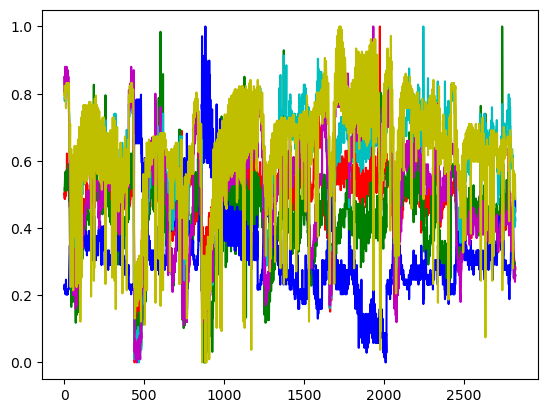

In [30]:
plt.plot(X_scaled[:,0], color="r", label="grocery")
plt.plot(X_scaled[:,1], color="g", label="park")
plt.plot(X_scaled[:,2], color="b", label="residential")
plt.plot(X_scaled[:,3], color="c", label="retail")
plt.plot(X_scaled[:,4], color="m", label="transit")
plt.plot(X_scaled[:,5], color="y", label="workplace")
plt.show()

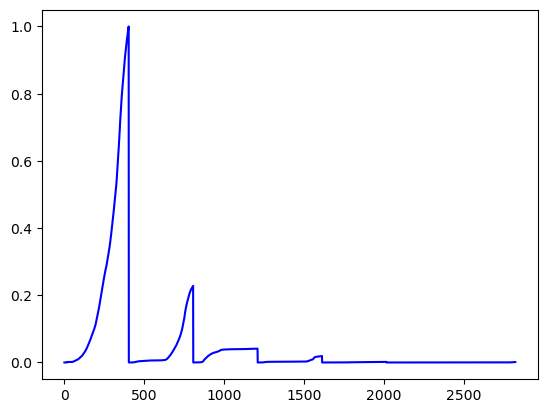

In [31]:
plt.plot(Y_scaled, color="b", label='Confirmed_case')
plt.show()

In [32]:
X_train, X_vt, Y_train, Y_vt = train_test_split(X_scaled, Y_scaled, test_size=0.2)

In [33]:
X_test, X_val, Y_test, Y_val = train_test_split(X_vt, Y_vt, test_size=0.5)

In [34]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(2256, 10) (283, 10) (282, 10) (2256,) (283,) (282,)


In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, LSTM

In [71]:
model = Sequential([
    Dense(256, activation='relu', input_shape=(10,)),
    Dropout(0.4),
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [47]:
# model = Sequential([LSTM(50, input_shape=(10,1), return_sequences = False),
#                    Dropout(0.2),
#                    Dense(1, activation = 'sigmoid')])

In [80]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [81]:
hist = model.fit(X_train, Y_train,
          batch_size=128, epochs=100, 
          validation_data=(X_val, Y_val))

Epoch 1/100
18/18 [==============================] - 0s 7ms/step - loss: 0.1343 - accuracy: 0.0195 - val_loss: 0.1025 - val_accuracy: 0.0212
Epoch 2/100
18/18 [==============================] - 0s 3ms/step - loss: 0.1113 - accuracy: 0.0195 - val_loss: 0.0967 - val_accuracy: 0.0212
Epoch 3/100
18/18 [==============================] - 0s 3ms/step - loss: 0.1086 - accuracy: 0.0195 - val_loss: 0.0956 - val_accuracy: 0.0212
Epoch 4/100
18/18 [==============================] - 0s 3ms/step - loss: 0.1065 - accuracy: 0.0195 - val_loss: 0.0939 - val_accuracy: 0.0212
Epoch 5/100
18/18 [==============================] - 0s 3ms/step - loss: 0.1045 - accuracy: 0.0195 - val_loss: 0.0928 - val_accuracy: 0.0212
Epoch 6/100
18/18 [==============================] - 0s 3ms/step - loss: 0.1036 - accuracy: 0.0195 - val_loss: 0.0920 - val_accuracy: 0.0212
Epoch 7/100
18/18 [==============================] - 0s 3ms/step - loss: 0.1025 - accuracy: 0.0195 - val_loss: 0.0912 - val_accuracy: 0.0212
Epoch 8/100
1

In [82]:
model.evaluate(X_test, Y_test)[1]

9/9 [==============================] - 0s 845us/step - loss: 0.0831 - accuracy: 0.0248


0.024822695180773735

In [83]:
model.predict(X_test)

9/9 [==============================] - 0s 736us/step


array([[1.49233121e-04],
       [1.28997825e-02],
       [1.87988408e-04],
       [3.56711098e-03],
       [4.71036229e-03],
       [1.41902510e-02],
       [1.77993948e-04],
       [4.77067858e-01],
       [8.56947713e-03],
       [5.56871470e-04],
       [2.80523370e-03],
       [4.35028633e-04],
       [7.41461739e-02],
       [2.14065373e-01],
       [8.03361065e-04],
       [5.11729624e-04],
       [9.17035562e-04],
       [3.39684798e-03],
       [4.70633758e-03],
       [1.18819624e-02],
       [4.17697281e-02],
       [2.40115859e-02],
       [4.57692295e-02],
       [9.41841118e-03],
       [9.07945037e-01],
       [2.35257484e-03],
       [2.45303992e-04],
       [1.67986527e-01],
       [3.01655091e-04],
       [2.14162725e-03],
       [1.13978260e-03],
       [2.11856663e-04],
       [1.37705050e-04],
       [2.25450742e-04],
       [5.74863842e-03],
       [2.05333263e-01],
       [1.54933470e-04],
       [1.19836070e-03],
       [3.25231254e-02],
       [4.11558634e-04],


In [84]:
train = model.predict(X_train)
test = model.predict(X_test)

9/9 [==============================] - 0s 747us/step


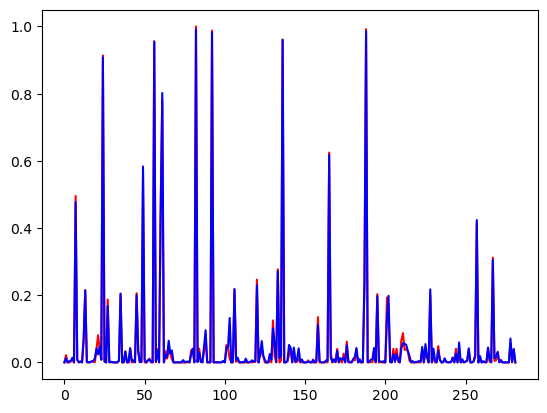

In [87]:
plt.plot(Y_test, color='r', label="RealData")
plt.plot(test, color='b', label='Predicted Test')
plt.show()

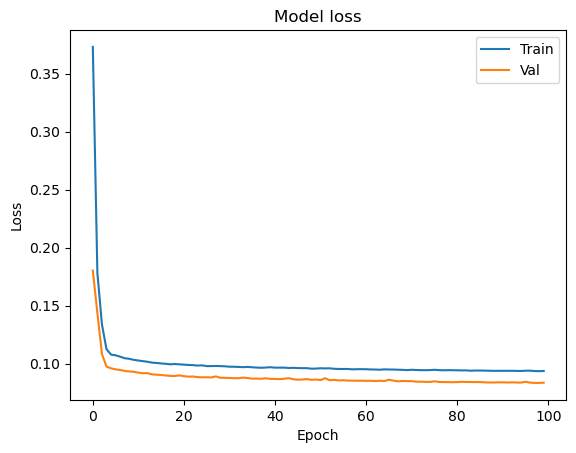

In [62]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

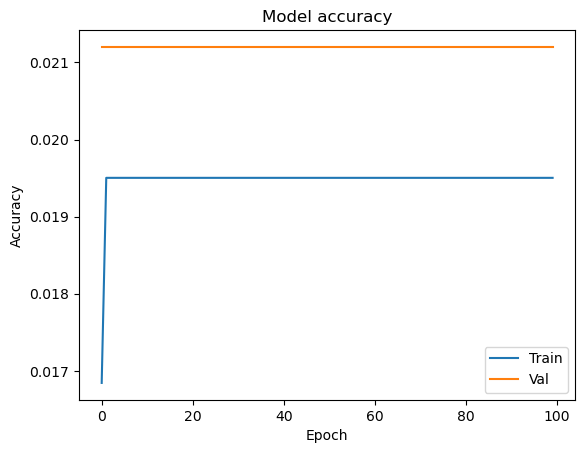

In [63]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [64]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dropout(0.8),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])

model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=10,
          validation_data=(X_val, Y_val))

Epoch 1/10
71/71 [==============================] - 1s 8ms/step - loss: 0.1645 - accuracy: 0.0195 - val_loss: 0.0993 - val_accuracy: 0.0212
Epoch 2/10
71/71 [==============================] - 0s 7ms/step - loss: 0.1109 - accuracy: 0.0195 - val_loss: 0.0944 - val_accuracy: 0.0212
Epoch 3/10
71/71 [==============================] - 0s 7ms/step - loss: 0.1066 - accuracy: 0.0195 - val_loss: 0.0925 - val_accuracy: 0.0212
Epoch 4/10
71/71 [==============================] - 0s 7ms/step - loss: 0.1052 - accuracy: 0.0195 - val_loss: 0.0904 - val_accuracy: 0.0212
Epoch 5/10
71/71 [==============================] - 1s 7ms/step - loss: 0.1037 - accuracy: 0.0195 - val_loss: 0.0959 - val_accuracy: 0.0212
Epoch 6/10
71/71 [==============================] - 0s 7ms/step - loss: 0.1048 - accuracy: 0.0195 - val_loss: 0.0893 - val_accuracy: 0.0212
Epoch 7/10
71/71 [==============================] - 1s 8ms/step - loss: 0.1026 - accuracy: 0.0195 - val_loss: 0.0890 - val_accuracy: 0.0212
Epoch 8/10
71/71 [==

9/9 [==============================] - 0s 3ms/step


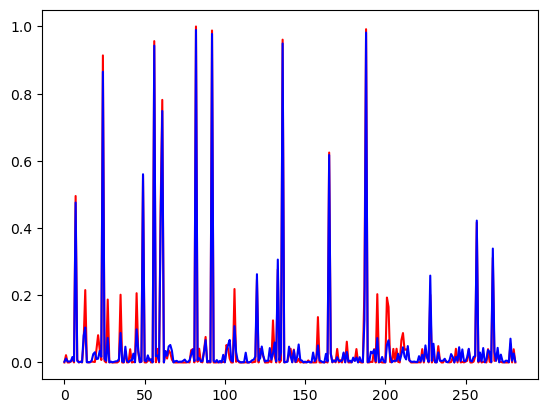

In [65]:
test = model_2.predict(X_test)
plt.plot(Y_test, color='r', label="RealData")
plt.plot(test, color='b', label='Predicted Test')
plt.show()

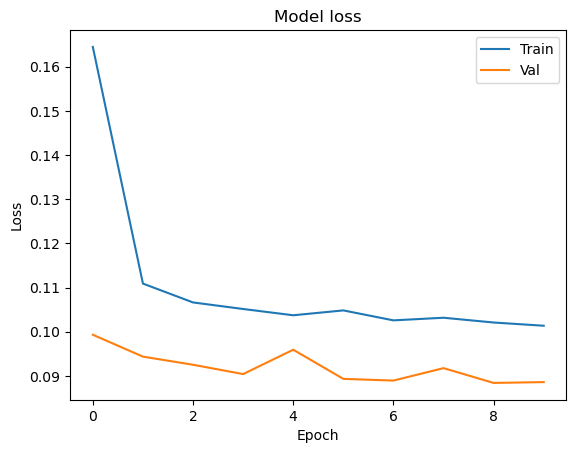

In [66]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

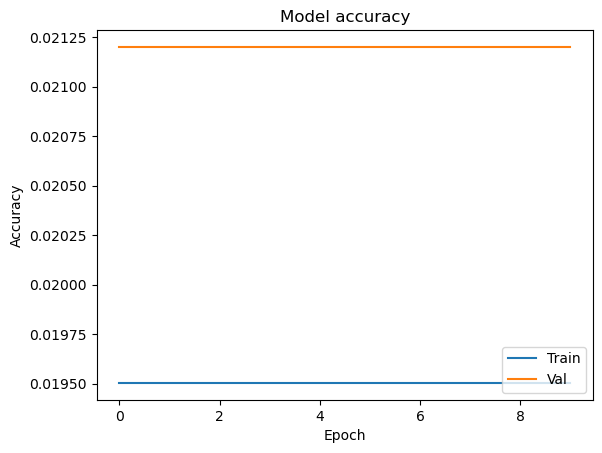

In [67]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

### Kesimpulan



Berikan simpulan yang dilakukan dari hasil kerja menggunakan algoritma dan 2 dataset yang
dipilih. Simpulan bisa berkisar antara (bisa di modifikasi):

    - Simpulan perbandingan dataset
    - Hasil akurasi yang diberikan (jika ada dalam modul)
    - Hasil perbandingan akurasi antara algoritma (jika ada dalam modul)
    - Hasil pemikiran dan observasi akhir dari kerja menurut mahasiswa.

In [ ]:
# Footer
myDate = datetime.datetime.now()
print("I certify that this is my own work.")
print("Signed by:")
print("Name: \t{}".format(myName))
print("NIM: \t{}".format(myNIM))
print("Time-stamp:\t{}".format(myDate))

***

### Save the notebook, then convert the notebook to html (by running the next code).

In [ ]:
!jupyter nbconvert --to html "./IF540L_kelas_A_laporan_MXX_45444_Antonius Kevin.ipynb" --output-dir="./"

### Next step:
* convert the generated html file to PDF using the online tool: https://www.sejda.com/html-to-pdf
* choose the following settings:
    * Page size: One long page
    * Page Orientation: auto
    * Use print stylesheet
* Submit your ipython notebook and PDF files

Markdown basics https://markdown-guide.readthedocs.io/en/latest/basics.html#